<div>
    <p><b>Username: </b>yaraelzahy</p>
    <p><b>Displayed Name: </b> Yara Elzahy</p>
    <p><b>ID: </b>20398570</p>
</div>

# Fake Reddit Prediction Competition 🎯

## Questions ❓

#### 🌈 What is the difference between Character n-gram and Word n-gram? Which one tends to suffer more from the OOV issue?
 **Difference between character n-gram and word n-gram:**
<ul>
    <li>Character and word n-grams can both be found in text documents; however the difference is that character n-grams portray the document as a sequence of characters, while Word n-grams describe the document as a sequence of words.</li>
    <li>There are more character N-gram repetitions than word N-gram repetitions in a given language document.</li>
    <li>A character N-gram split reveals some common traits that a word N-gram split does not.</li>
    <li>Character N-grams make languages more similar, displaying more repetition.</li>
</ul>

Word n-grams are the ones that will suffer more from out-of-vocabulary issue.



#### 🌈 What is the difference between stop word removal and stemming? Are these techniques language-dependent?

Both are important text preprocessing techniques, but the main difference is that stop word removal completely removes some predefined words that it knows from the sentence and keeps a list of these words, whereas stemming is about reducing the word and returning it to its root, such as removing suffixes and prefixes rather than removing the entire word, e.g playing -> play, and so on. Abd yes, these techniques are language-dependent.

#### 🌈 Is tokenization techniques language dependent? Why?

Tokenization splits a block of text into individual words using a specified delimiter. Different word-level tokens are generated based on the delimiters, not the language. Therefore it is language dependent, because it has to know the meaning of each word to split it depending on language, e.g. wasn't>> wasn't>>wasn't>>wasn't>>wasn t >>. 

These are all tokenization possibilities, but some of them are meaningless in the language.


#### 🌈 What is the difference between count vectorizer and tf-idf vectorizer? Would it be feasible to use all possible n-grams? If not, how should you select them?

TfidfVectorizer and CountVectorizer are both approaches for transforming text input to vectors because the model can only analyse numerical data.

The Count Vectorizer counts the number of times a word appears in a text (using a bag-of-words technique), whereas the TF-IDF Vectorizer considers not only the number of times a word appears in a document, but also how significant that word is to the entire corpus.

it wouldn't be feasiable to use all possible n-grams.
Creating n-gram ranges that use bigrams or trigrams can significantly increase classification accuracy because they can catch more complex expressions created by the combination of more than one word. The reasoning is that the outcome of Sentiment Analysis is determined not only by the frequency of words but also by how they are mixed.

N-gram range sets if features to be used to characterize texts will be:
Unigrams or words (n-gram size = 1)
Bigrams or terms compounded by two words (n-gram size = 2)
Trigrams or terms compounded by up to three words (n-gram size = 3)



## Problem Formulation:

### Problem Definition

False information on the Internet has caused a rise of social concerns as a result of the expansion of social networks and their involvement in other domains such as politics. We'll use the headline of a Reddit post to determine whether it's fake news or not.


### Input
The input is the text feature, which contains a wide range of forms of words.


### Output
Whether or not a particular Reddit post is fake news. The label column is output from the dataset.


### What data mining function is required?

In this scenario, binary classification will be used to divide data points into multiple classes (fake: 0 or not fake: 1) to determine whether a certain reddit post is fake news or not.


### What could be the challenges?
<ul>
     <li>The data contains multiple word forms.</li>
     <li>The datasets contain outlier values.</li>
     <li>By looking at the title of a certain Reddit post, you may anticipate if it is fake news or not.</li>
</ul>



### What is the impact?

Limiting the spread of rumours and misleading news


### What preprocessing steps are used?

<ol>
    <li>Remove outliers.</li>
    <li>Cleaning and preprocessing the text.</li>
    <li>Compute the frequency of the words.</li>
</ol>

### What is the experimental protocol used and how was it carried out?

<ol>
    <li>Read the data from csv files</li>
    <li>Clean the text by removing any html tags, digits, single letter chars, stopwords, punctuation, the noise data, convert all whitespaces to single whitespace and perform stemming.</li>
    <li>Split the training dataset into training data and validation data.</li>
    <li>Use the Cross validation to obtain well-trained models.</li>
    <li>Determine the optimal hyperparameter combination for a given model using GridSearch, RandomSearch and BayesianSearch.</li>
    <li>Use XGBoost, Random Forest and Logistic Regression to fit the model.</li>   
</ol>


### What is an ideal solution?

According to my following trials, the best strategy is the **GridSearch, validation set and logistic regression model with word-level vectorizer (Trial 1)** because it gives me the highest score on kaggle.

<ul>
    <li>colab score: 0.88810</li>
    <li>private score: 0.85803</li>
</ul>

## Import Libraries

In [1]:
import re
import nltk
import pickle
import sklearn
import warnings
import numpy as np
import pandas as pd
import holoviews as hv
from pathlib import Path
from bokeh.io import output_notebook
from pandas.core.frame import DataFrame

output_notebook()
warnings.filterwarnings("ignore")

np.random.seed(0)

# some settings for pandas and hvplot
pd.options.display.max_columns = 100
pd.options.display.max_rows = 300
pd.options.display.max_colwidth = 100
np.set_printoptions(threshold=2000)

Loading BokehJS ...

In [2]:
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from nltk.corpus import stopwords #remove the low-level information from our text in order to give more focus to the important
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize
from sklearn.pipeline import make_pipeline
from nltk.stem.snowball import SnowballStemmer
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier # to use RandomForestClassifier model for my data
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV , RandomizedSearchCV

In [6]:
# Read train data from csv file
np.random.seed(1)
data = pd.read_csv("xy_train.csv", sep=",", na_values=[""])
data

,id,text,label
0,265723,"A group of friends began to volunteer at a homeless shelter after their neighbors protested. ""Se...",0
1,284269,"British Prime Minister @Theresa_May on Nerve Attack on Former Russian Spy: ""The government has c...",0
2,207715,"In 1961, Goodyear released a kit that allows PS2s to be brought to heel. https://m.youtube.com/w...",0
3,551106,"Happy Birthday, Bob Barker! The Price Is Right Host on How He'd Like to Be Remembered | ""As the ...",0
4,8584,"Obama to Nation: 聙""Innocent Cops and Unarmed Young Black Men Should Not be Dying Before Magic Jo...",0
...,...,...,...
59995,70046,"Finish Sniper Simo H盲yh盲 during the invasion of Finland by the USSR (1939, colorized)",0
59996,189377,"Nigerian Prince Scam took $110K from Kansas man; 10 years later, he's getting it back",1
59997,93486,Is It Safe To Smoke Marijuana During Pregnancy? You鈥檇 Be Surprised Of The Answer | no,0
59998,140950,Julius Caesar upon realizing that everyone in the room has a knife except him (44 bc),0


## Check for Null values

In [7]:
# print the sum of null values in our dataset
data.isnull().sum().sum()

0

There are no null values

## Check for duplicates

In [8]:
# print the sum of duplicate values
data.duplicated().sum()

0

There are no duplicates

In [9]:
data.shape

(60000, 3)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      60000 non-null  int64 
 1   text    60000 non-null  object
 2   label   60000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ MB


## Check for Label Distribution

In [11]:
# display unique label values' counts
data['label'].value_counts()

0    32172
1    27596
2      232
Name: label, dtype: int64

<Axes: >

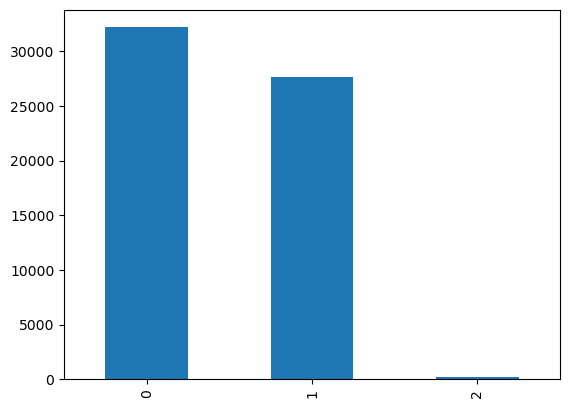

In [12]:
# Match distribution
data['label'].value_counts().plot(kind='bar')

The label values are 0 and 1 only, thus we'll remove all the rows with the label value 2 because it's an **outlier**.

In [13]:
# drop all the rows with label value of 2
data.drop(data[(data['label'] == 2)].index, inplace=True)

In [14]:
# check for the count of each label value after removing the outlier label
data['label'].value_counts()

0    32172
1    27596
Name: label, dtype: int64

<Axes: >

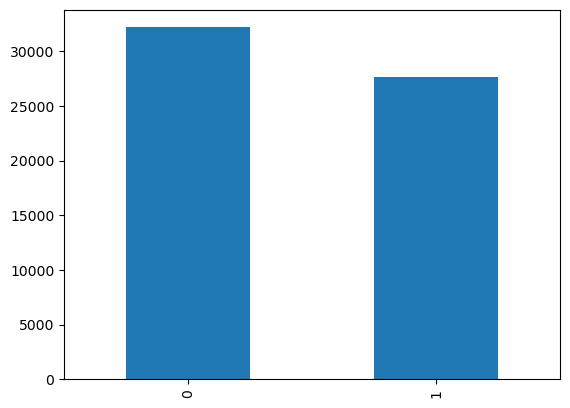

In [15]:
# Match distribution
data['label'].value_counts().plot(kind='bar')

## Separate Data from labels

In [16]:
# remove all columns except rating (target column)
X_train= data.drop(columns=['label', 'id'])

# select only the target column 
y_train= data['label']

In [17]:
# print the shape of data and labels
X_train.shape, y_train.shape

((59768, 1), (59768,))

In [18]:
X_train.head(2)

,text
0,"A group of friends began to volunteer at a homeless shelter after their neighbors protested. ""Se..."
1,"British Prime Minister @Theresa_May on Nerve Attack on Former Russian Spy: ""The government has c..."


In [19]:
y_train.head(2)

0    0
1    0
Name: label, dtype: int64

## Data Cleaning and pre-processing

Consistent and clean data is critical for successful modelling results. The underlying premise is the same regardless of how smart your model is: trash in, trash out. Cleaning and pre-processing in NLP can vary depending on which model you wish to employ. For our text, we shall employ frequency-based representation approaches. As a result, we perform extensive processing on the input data:

In [20]:
nltk.download('punkt')#download punkt pakages from nltk library
nltk.download('stopwords')#download stopwords pakages from nltk library
# A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore
stemmer = SnowballStemmer(language='english')
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package punkt to C:\Users\WIN
[nltk_data]     11\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\WIN
[nltk_data]     11\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
def clean_text(text, for_embedding=True):  #will apply embedding 
    """ steps:
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    if for_embedding:
        # Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            stemmer.stem(word) for word in words_tokens_lower if word not in stop_words
        ]

    text_clean = " ".join(words_filtered)
    return text_clean

In [22]:
%%time
# Clean Text
# get all text data the length it greater than 20 in train dataset
X_train["text_clean"] = X_train.loc[X_train["text"].str.len() > 20, "text"]

# call clean_text method to clean the text_clean feature in the train dataset
X_train["text_clean"] = X_train["text_clean"].map(
    lambda x: clean_text(x, for_embedding=True) if isinstance(x, str) else x
)

CPU times: total: 32.7 s
Wall time: 34.8 s


In [23]:
X_train.head(2)

,text,text_clean
0,"A group of friends began to volunteer at a homeless shelter after their neighbors protested. ""Se...",group of friends began to volunteer at homeless shelter after their neighbors protested . Seeing...
1,"British Prime Minister @Theresa_May on Nerve Attack on Former Russian Spy: ""The government has c...",British Prime Minister Theresa May on Nerve Attack on Former Russian Spy The government has conc...


In [24]:
# override the X_train with the cleaned text
X_train=X_train['text_clean']

# show data by dataframe 
data_train = DataFrame(X_train)

### Feature creation with TF-IDF


Since classification algorithms cannot directly handle text input, we must convert our comments to a numeric representation.
A vector of numbers is constructed, with each element representing a word. Therefore, the length of the vector will equal the number of unique words.

In [25]:
"""
TF-IDF are word frequency scores that try to highlight words that are more interesting
Compute unique word vector with frequencies
exclude very uncommon (<10 obsv.) and common (>=30%) words
use pairs of two words (ngram)
"""
vectorizer = TfidfVectorizer(
    analyzer="word", max_df=0.3, min_df=10, ngram_range=(1, 2), norm="l2"
)
vectorizer.fit(X_train)

TfidfVectorizer(max_df=0.3, min_df=10, ngram_range=(1, 2))

In [26]:
# apply vector transform
X_train_transformed = vectorizer.transform(X_train)

In [27]:
print('X_train_transformed', X_train_transformed.shape)
print('y_train', y_train.shape)

X_train_transformed (59768, 21026)
y_train (59768,)


In [28]:
# Vector representation of vocabulary
word_vector = pd.Series(vectorizer.vocabulary_).sample(5, random_state=1)
print(f"Unique word (ngram) vector extract:\n\n {word_vector}")

Unique word (ngram) vector extract:

 wipe              20467
of medical        11879
my grandfather    11148
can someone        2715
crop               3940
dtype: int64


In [ ]:
ghdjksah

## Trial 1

#### Plan:
In the 1st trial, we'll use the pipeline with GridSearch, validation set and logistic regression model with word-level vectorizer.

#### Expectations:
I anticipate a high grade because logistic regression is an excellent contender for solving these kind of problems.

#### Observations:
The best hyperparameters for this model will be:
    **C** = 1.3,   **class_weight** = 'balanced' ,   **penalty** = 'l2' and **solver** = 'saga'


producing the following scores:

<ul>
    <li>colab score: 0.88810</li>
    <li>kaggle score: 0.85803</li>

</ul>

In [ ]:
%%time
#use pipline and gridsearch to tuning hyperparameter 
pipe_Log_reg =  Pipeline([("Log_reg", LogisticRegression())])

# The parameter C is the the inverse of regularization strength in Logistic Regression
params = {
          'Log_reg__penalty': ['l2'], # l2 regularization
          'Log_reg__C' : [0.6,0.9,1,1.3],
          'Log_reg__class_weight': ['balanced',None],
          'Log_reg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
          }
param_grid  = GridSearchCV(
    pipe_Log_reg, params, cv=5, verbose=1, n_jobs=2, 
    scoring='roc_auc')
#fit X_train and y_train
param_grid.fit(X_train_transformed,y_train)
#print best score
print(f'Best_score = {param_grid.best_score_}')
#print best Params
print(f'Best_params = {param_grid.best_params_}')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best_score = 0.8881014090211051
Best_params = {'Log_reg__C': 1.3, 'Log_reg__class_weight': 'balanced', 'Log_reg__penalty': 'l2', 'Log_reg__solver': 'saga'}
CPU times: user 1.93 s, sys: 227 ms, total: 2.16 s
Wall time: 1min 33s


### Here comes the moment of truth 🫣🥁

## Prepare the test data

In [29]:
# read test data from csv file
df = pd.read_csv("x_test.csv")

# show the top 2 rows of the data
df.head(2)

,id,text
0,0,stargazer
1,1,yeah


In [30]:
# save a copy of th data from original file
data_test=df.copy() 

# drop the id column
data_test=data_test.drop(['id'],axis=1)

In [31]:
%%time
# Clean text
data_test["text_clean"] = data_test.loc[data_test["text"].str.len() > 0, "text"]
data_test["text_clean"] = data_test["text_clean"].map(
    lambda x: clean_text(x, for_embedding=True) if isinstance(x, str) else x
)

CPU times: total: 17.7 s
Wall time: 19.9 s


In [32]:
# assign the cleaned text to a new variable
X_test=data_test['text_clean']
# print the data as dataframe
DataFrame(X_test)

,text_clean
0,stargazer
1,yeah
2,PD Phoenix car thief gets instructions from YouTube video
3,"As Trump Accuses Iran , He Has One Problem His Own Credibility"
4,Believers Hezbollah
...,...
59146,Bicycle taxi drivers of New Delhi
59147,Trump blows up GOP formula for winning House races
59148,"Napoleon returns from his exile on the island of Elba . March , Colourised"
59149,Deep down he always wanted to be ballet dancer


## Evaluate the Model

In [ ]:
# apply vectorization on test data 
X_test_transformed = vectorizer.transform(X_test)

In [ ]:
# print shape of test data 
print('X_test_transformed', X_test_transformed.shape)

X_test_transformed (59151, 21026)


In [ ]:
# predict yhat
y_pred = param_grid.predict_proba(X_test_transformed)

In [ ]:
# save results to csv submission file
submission = pd.DataFrame()

submission['id'] = df['id']

submission['label'] = y_pred[:,1]

submission.to_csv('1submission.csv', index=False)

************************

## Trial 2
Use the same technique word analyzer (TF-IDF) with xgboost and Grid Search with cross validation

#### Plan:
In the 2nd trial, we'll combine word anaylzer with an xgboost model and a Grid search with cross-validation.

#### Expectations:
The XGBoost model usually performs well with classification problems, so I believe it will give a good result.

#### Observations:
The best hyperparameters for this model will be:
 **max_depth** = 11 and **n_estimators** = 900

producing the following scores:

<ul>
    <li>colab score: 0.86031</li>
    <li>kaggle score: 0.82003</li>

</ul>

In [ ]:
xgb = XGBClassifier(scale_pos_weight=1, 
                      colsample_bytree = 0.4,
                      learning_rate=0.01,
                       max_depth=12,
                      n_estimators=900,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      reg_alpha = 0.3,
                    )
full_pipline1 = Pipeline(
    steps=[
        ('my_classifier', xgb,)
    ]
)
full_pipline1

Pipeline(steps=[('my_classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.4, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.02,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=11, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=900,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [ ]:
full_pipline1 = full_pipline1.fit(X_train_transformed,y_train)    

In [ ]:
# here we specify the search space
param_grid = {
      'my_classifier__n_estimators': [700,900],     
       'my_classifier__max_depth':[7,10] ,
     
}
# cv=10 means ten-fold cross-validation

grid_search = GridSearchCV(
    full_pipline1, param_grid, cv=5, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(X_train_transformed, y_train)
print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 10 folds for each of 4 candidates, totalling 40 fits
best score 0.8603125418671764
best score {'my_classifier__max_depth': 11, 'my_classifier__n_estimators': 900}


## Evaluate the Model

In [ ]:
# print the shape of the test data 
print('X_test_transformed', X_test_transformed.shape)

X_test_transformed (59151, 21026)


In [ ]:
# predict yhat 
y_pred = grid_search.predict_proba(X_test_transformed)

In [ ]:
# save results to csv submission file
submission = pd.DataFrame()

submission['id'] = df['id']

submission['label'] = y_pred[:,1]

submission.to_csv('2submission.csv', index=False)

# Trial 3
#### Plan:
In the 3rd trial, we'll combine the Bag of Words approach (CountVectorizer) with a Logistic Regression model and a Grid search.

When creating the vocabulary, it ignores terms with a document frequency strictly greater than the set threshold. This could be used to eliminate phrases that are overly common and are unlikely to aid in label prediction.

#### Expectations:
Eventhough, the bag of words is a good strategy, I believe it will not give a result as good as that in trial 1.

#### Observations:
The best hyperparameters for this model will be:
    **C** = 0.8,   **class_weight** = 'balanced' ,   **penalty** = 'l2' and **solver** = 'newton-cg'

producing the following scores:

<ul>
    <li>colab score: 0.86742</li>
    <li>kaggle score: 0.82003</li>

</ul>

In [ ]:
# Initialize a CountVectorizer object: count_vectorizer
Count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                  ngram_range=(1, 2),max_df=0.3, min_df=10, max_features=None,strip_accents='unicode',token_pattern=r'\w{2,}')

In [ ]:
# Transforms the data into a bag of words
Count_train = Count_vec.fit(X_train)
X_train_trans= Count_vec.transform(X_train)

In [ ]:
print('X_train_transformed', X_train_trans.shape)
print('y_train', y_train.shape)

X_train_transformed (59768, 11393)
y_train (59768,)


In [ ]:
%%time
pipe_Log_reg =  Pipeline([("Log_reg", LogisticRegression())])
params = {
          'Log_reg__penalty': ['l2'],
          'Log_reg__C' : [0.8],
          'Log_reg__class_weight': ['balanced',None],
          'Log_reg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
          }
param_grid  = GridSearchCV(
    pipe_Log_reg, params, cv=10, verbose=1, n_jobs=2, 
    scoring='roc_auc')

# fit X_train and y_train
param_grid.fit(X_train_trans,y_train)

print(f'Best_score = {param_grid.best_score_}')
print(f'Best_params = {param_grid.best_params_}')

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best_score = 0.8674246772456018
Best_params = {'Log_reg__C': 0.8, 'Log_reg__class_weight': 'balanced', 'Log_reg__penalty': 'l2', 'Log_reg__solver': 'newton-cg'}
CPU times: user 2.41 s, sys: 1.63 s, total: 4.04 s
Wall time: 1min 33s


## Evaluate the Model

In [ ]:
X_test=data_test['text_clean']
X_test_trans= Count_vec.transform(X_test)
print('X_train_transformed', X_test_trans.shape)

X_train_transformed (59151, 11393)


In [ ]:
# predict the results
y_pred2=param_grid.predict_proba(X_test_trans)
# save the results to csv submission file
submission = pd.DataFrame()

submission['id'] = df['id']

submission['label'] = y_pred2[:,1]

submission.to_csv('3submission.csv', index=False)

## Trial 4
#### Plan:
In the 4th trial, we'll use the TfidfVectorizer with a Gradient Boosting model and a grid search.

#### Expectations:
I don't expect the result to be that good.

#### Observations:
The best hyperparameters for this model will be:
    **max_depth** = 13,   **max_features** = 'sqrt' and   **min_samples_split** = 500

producing the following scores:

<ul>
    <li>colab score: 0.76701</li>
    <li>kaggle score: 0.74172</li>

In [ ]:
data_train.head(2)

,text_clean
0,group of friends began to volunteer at homeless shelter after their neighbors protested . Seeing...
1,British Prime Minister Theresa May on Nerve Attack on Former Russian Spy The government has conc...


In [ ]:
import time
start_time=time.time()
# remove '\\n'
data_train['clean_text'] = data_train['text_clean'].map(lambda x: re.sub('\\n',' ',str(x)))
# remove any text starting with User... 
data_train['clean_text'] = data_train['text_clean'].map(lambda x: re.sub("\[\[User.*",'',str(x)))
# remove IP addresses or user IDs
data_train['clean_text'] = data_train['text_clean'].map(lambda x: re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'',str(x)))
#remove http links in the text
data_train['clean_text'] = data_train['text_clean'].map(lambda x: re.sub("(http://.*?\s)|(http://.*)",'',str(x)))
end_time=time.time()
print("total time",end_time-start_time)

total time 0.598578691482544


In [ ]:
data_train.head(2)

,text_clean,clean_text
0,group of friends began to volunteer at homeless shelter after their neighbors protested . Seeing...,group of friends began to volunteer at homeless shelter after their neighbors protested . Seeing...
1,British Prime Minister Theresa May on Nerve Attack on Former Russian Spy The government has conc...,British Prime Minister Theresa May on Nerve Attack on Former Russian Spy The government has conc...


In [ ]:
X_train=data_train['clean_text'] 

In [ ]:
# Instantiate the vectorizer
vectorizer = TfidfVectorizer(
    analyzer="char", max_df=0.3, min_df=8, ngram_range=(1, 2), norm="l2",token_pattern=r'\w{1,}',stop_words='english')

In [ ]:
# fit and transform on it the training features
vectorizer.fit(X_train)
X_train_word_features =vectorizer.transform(X_train)

In [ ]:
print('X_train_transformed', X_train_word_features.shape)
print('y_train', y_train.shape)

X_train_transformed (59768, 667)
y_train (59768,)


In [ ]:
%%time
pipe_Log_reg =  Pipeline([("Log_reg", GradientBoostingClassifier())])
params = {
          'Log_reg__min_samples_split': [400,500],
          'Log_reg__max_features' : ['sqrt'],
          'Log_reg__max_depth': [11,13]          }
param_grid  = GridSearchCV(
    pipe_Log_reg, params, cv=10, verbose=1, n_jobs=2, 
    scoring='roc_auc')
#fit X_train and y_train
param_grid.fit(X_train_word_features,y_train)
print(f'Best_score = {param_grid.best_score_}')
print(f'Best_params = {param_grid.best_params_}')

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best_score = 0.76701201277468
Best_params = {'Log_reg__max_depth': 13, 'Log_reg__max_features': 'sqrt', 'Log_reg__min_samples_split': 500}
CPU times: user 19.3 s, sys: 309 ms, total: 19.6 s
Wall time: 7min 59s


## Evaluate the Model

In [ ]:
import time
start_time=time.time()
# remove '\\n'
data_test['clean_text'] = data_test['text_clean'].map(lambda x: re.sub('\\n',' ',str(x)))
# remove any text starting with User... 
data_test['clean_text'] = data_test['text_clean'].map(lambda x: re.sub("\[\[User.*",'',str(x)))
# remove IP addresses or user IDs
data_test['clean_text'] = data_test['text_clean'].map(lambda x: re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'',str(x)))
#remove http links in the text
data_test['clean_text'] = data_test['text_clean'].map(lambda x: re.sub("(http://.*?\s)|(http://.*)",'',str(x)))
end_time=time.time()
print("total time",end_time-start_time)

total time 0.3256227970123291


In [ ]:
X_test=data_test['clean_text'] 
X_test_word_features = vectorizer.transform(X_test)
print('X_test_transformed', X_test_word_features.shape)

X_test_transformed (59151, 667)


In [ ]:
y_pred3=param_grid.predict_proba(X_test_word_features)
submission = pd.DataFrame()

submission['id'] = df['id']

submission['label'] = y_pred3[:,1]

submission.to_csv('4submission.csv', index=False)

# Trial 5
#### Plan:
In the 5th trial, we'll use the TfidfVectorizer with a Logistic Regression model and a random search search.

#### Expectations:
I expect using the logistic regression with TfidfVectorizer will give a good result.

#### Observations:
The best hyperparameters for this model will be:
    **C** = 1,   **class_weight** = 'balanced' ,   **penalty** = 'l2' and **solver** = 'lbfgs'

producing the following scores:

<ul>
    <li>colab score: 0.86103</li>
    <li>kaggle score: 0.83221</li>

</ul>


In [ ]:
%%time
# n_jobs=2 means the cucurrent number of jobs
# scoring depends on roc_auc
# i used n_iter=10 

pipe= Pipeline([("tfidf", TfidfVectorizer(analyzer='word')),
        ('Log_reg', LogisticRegression()
        )])
param_grid = {
          'Log_reg__penalty': ['l2'], #l2 regularization
          'Log_reg__C' : [0.6,0.9,1],#The parameter C is the the inverse of regularization strength in Logistic Regression
          'Log_reg__class_weight': ['balanced',None],
          'Log_reg__solver': ['newton-cg', 'lbfgs', 'liblinear']
          }


random = RandomizedSearchCV(
    pipe, param_grid, cv=2, verbose=1, n_jobs=2, 
    # number of random trials
    n_iter=10,
    scoring='roc_auc')

# fit Random_search
random.fit(X_train, y_train)

# print best_score and best_params for Random_search
print('best score {}'.format(random.best_score_))
print('best score {}'.format(random.best_params_))

Fitting 2 folds for each of 10 candidates, totalling 20 fits
best score 0.8610331713831172
best score {'Log_reg__solver': 'lbfgs', 'Log_reg__penalty': 'l2', 'Log_reg__class_weight': 'balanced', 'Log_reg__C': 1}
CPU times: user 3.94 s, sys: 2.77 s, total: 6.71 s
Wall time: 35.5 s


## Evaluate the Model

In [ ]:
# save the cleaned text in a new variable
X_test=data_test['text_clean'] 

# predict the results
y_pred5=random.predict_proba(X_test)

# save the results to csv submission file
submission = pd.DataFrame()

submission['id'] = df['id']

submission['label'] = y_pred5[:,1]

submission.to_csv('5submission.csv', index=False)

### Aaaaaand

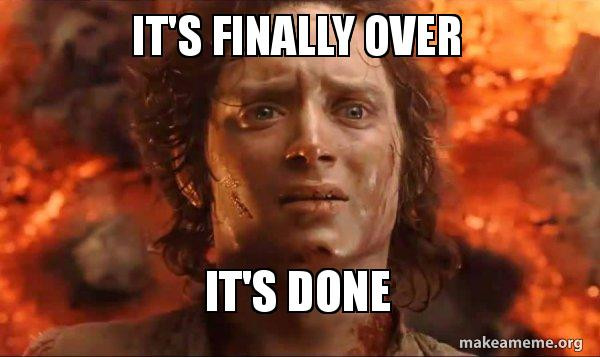